# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Stroke Data Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-warning">

# <span style=" color:red"> Stroke Data Project
</span>

Welcome to the data analysis assignment on the Stroke Data Project! In this assignment, we will work with a dataset containing information about various strokes. According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
</span>

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [59]:
import warnings
warnings.filterwarnings("ignore")


In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 
</span>

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

In [61]:
print(data.isnull().sum())

data['bmi'] = data['bmi'].fillna(data['bmi'].median())

print(data.isnull().sum())


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [62]:
duplicates = data.duplicated()
print(f"Çift kayıt sayısı: {duplicates.sum()}")

data = data.drop_duplicates()

print(f"Çift kayıt sayısı: {data.duplicated().sum()}")


Çift kayıt sayısı: 0
Çift kayıt sayısı: 0


In [63]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

print(data.columns)


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal
</span>

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does age influence stroke occurrence?
</span>

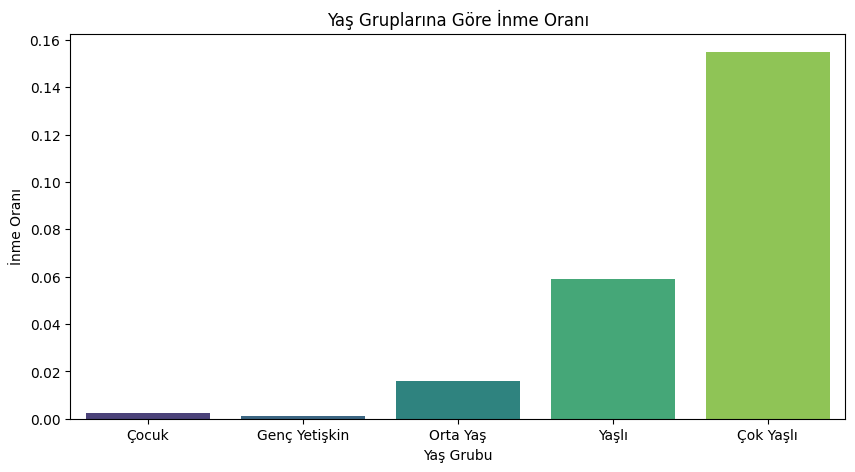

In [64]:
bins = [0, 18, 35, 50, 65, 100]  
labels = ['Çocuk', 'Genç Yetişkin', 'Orta Yaş', 'Yaşlı', 'Çok Yaşlı']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

age_group_stroke = data.groupby('age_group')['stroke'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_stroke.index, y=age_group_stroke.values, palette="viridis")
plt.title("Yaş Gruplarına Göre İnme Oranı")
plt.xlabel("Yaş Grubu")
plt.ylabel("İnme Oranı")
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Do body mass index (BMI) and glucose levels jointly or independently increase stroke risk?
</span>

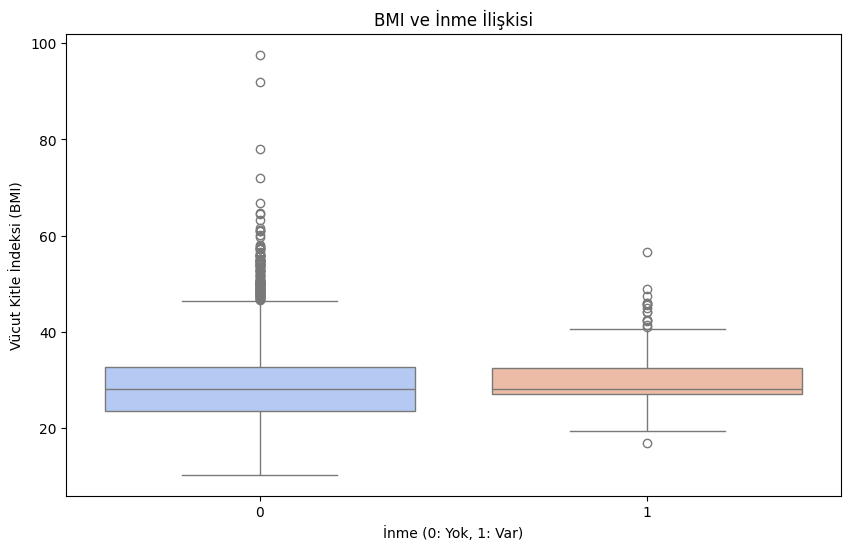

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['stroke'], y=data['bmi'], palette='coolwarm')
plt.title("BMI ve İnme İlişkisi")
plt.xlabel("İnme (0: Yok, 1: Var)")
plt.ylabel("Vücut Kitle İndeksi (BMI)")
plt.show()


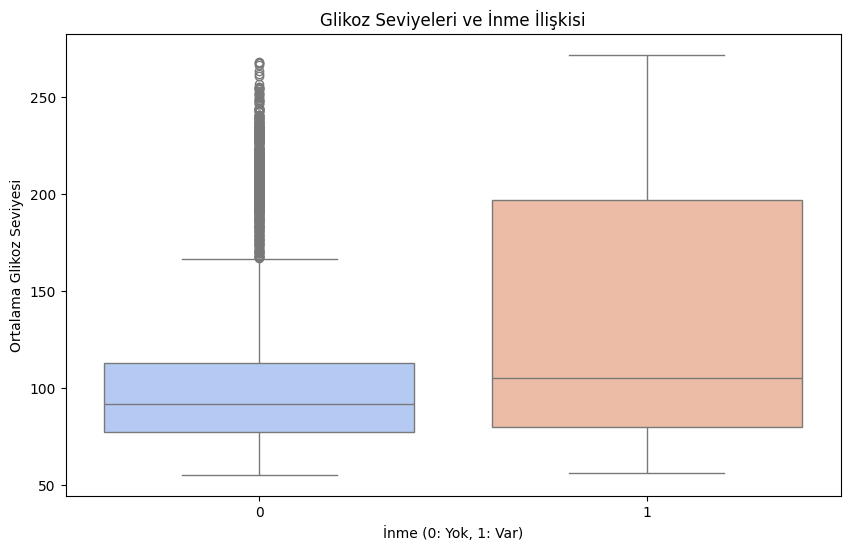

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['stroke'], y=data['avg_glucose_level'], palette='coolwarm')
plt.title("Glikoz Seviyeleri ve İnme İlişkisi")
plt.xlabel("İnme (0: Yok, 1: Var)")
plt.ylabel("Ortalama Glikoz Seviyesi")
plt.show()


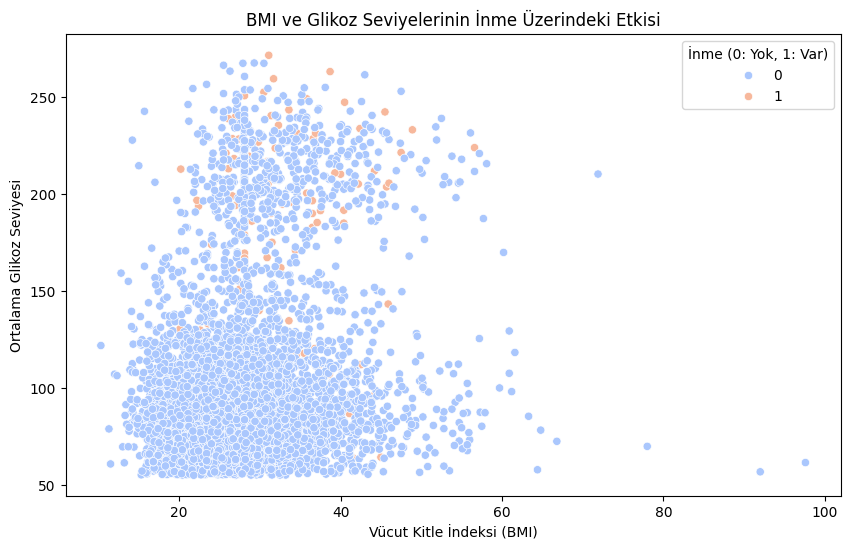

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['bmi'], y=data['avg_glucose_level'], hue=data['stroke'], palette='coolwarm')
plt.title("BMI ve Glikoz Seviyelerinin İnme Üzerindeki Etkisi")
plt.xlabel("Vücut Kitle İndeksi (BMI)")
plt.ylabel("Ortalama Glikoz Seviyesi")
plt.legend(title="İnme (0: Yok, 1: Var)")
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Can smoking increase the likelihood of stroke?
</span>

<Figure size 800x600 with 0 Axes>

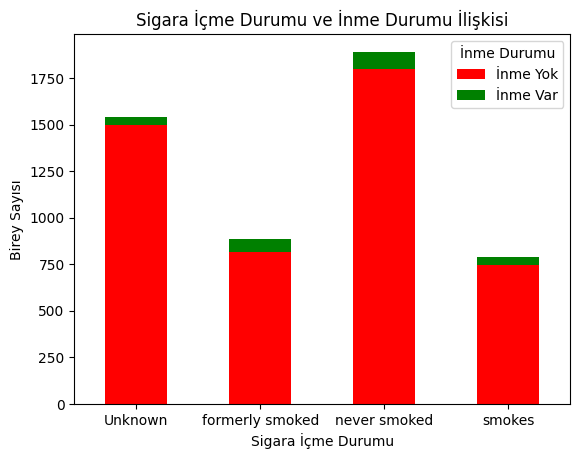

stroke                  0         1
smoking_status                     
Unknown          0.969560  0.030440
formerly smoked  0.920904  0.079096
never smoked     0.952431  0.047569
smokes           0.946768  0.053232


In [68]:
smoking_stroke = data.groupby(['smoking_status', 'stroke']).size().unstack().fillna(0)

plt.figure(figsize=(8, 6))
smoking_stroke.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Sigara İçme Durumu ve İnme Durumu İlişkisi')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Birey Sayısı')
plt.xticks(rotation=0)
plt.legend(title='İnme Durumu', labels=['İnme Yok', 'İnme Var'])
plt.show()

smoking_inme_rate = smoking_stroke.div(smoking_stroke.sum(axis=1), axis=0)
print(smoking_inme_rate)


<div class="alert alert-block alert-success">

### <span style=" color:red"> Do individuals with heart disease face a higher stroke risk?
</span>

<Figure size 800x600 with 0 Axes>

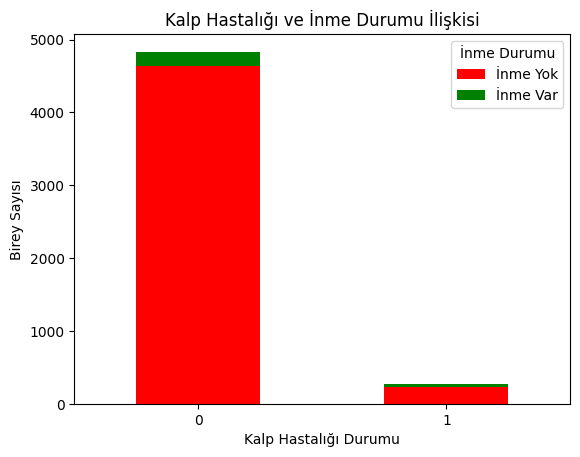

stroke                0         1
heart_disease                    
0              0.958213  0.041787
1              0.829710  0.170290


In [69]:
heart_disease_stroke = data.groupby(['heart_disease', 'stroke']).size().unstack().fillna(0)

plt.figure(figsize=(8, 6))
heart_disease_stroke.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Kalp Hastalığı ve İnme Durumu İlişkisi')
plt.xlabel('Kalp Hastalığı Durumu')
plt.ylabel('Birey Sayısı')
plt.xticks(rotation=0)
plt.legend(title='İnme Durumu', labels=['İnme Yok', 'İnme Var'])
plt.show()

heart_disease_inme_rate = heart_disease_stroke.div(heart_disease_stroke.sum(axis=1), axis=0)
print(heart_disease_inme_rate)


<div class="alert alert-block alert-success">

### <span style=" color:red"> Does work-related stress contribute to hypertension and subsequently to strokes?
</span>

<Figure size 1000x600 with 0 Axes>

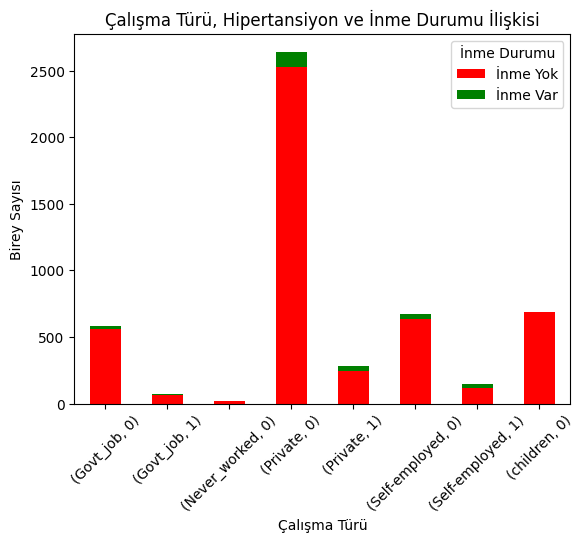

stroke                             0         1
work_type     hypertension                    
Govt_job      0             0.957192  0.042808
              1             0.890411  0.109589
Never_worked  0             1.000000  0.000000
Private       0             0.956127  0.043873
              1             0.882562  0.117438
Self-employed 0             0.940741  0.059259
              1             0.826389  0.173611
children      0             0.997089  0.002911


In [70]:
work_hypertension_stroke = data.groupby(['work_type', 'hypertension', 'stroke']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
work_hypertension_stroke.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Çalışma Türü, Hipertansiyon ve İnme Durumu İlişkisi')
plt.xlabel('Çalışma Türü')
plt.ylabel('Birey Sayısı')
plt.xticks(rotation=45)
plt.legend(title='İnme Durumu', labels=['İnme Yok', 'İnme Var'])
plt.show()

work_hypertension_inme_rate = work_hypertension_stroke.div(work_hypertension_stroke.sum(axis=1), axis=0)
print(work_hypertension_inme_rate)


<div class="alert alert-block alert-success">

### <span style=" color:red"> Are males at higher risk of strokes due to work-related or lifestyle stress?
</span>

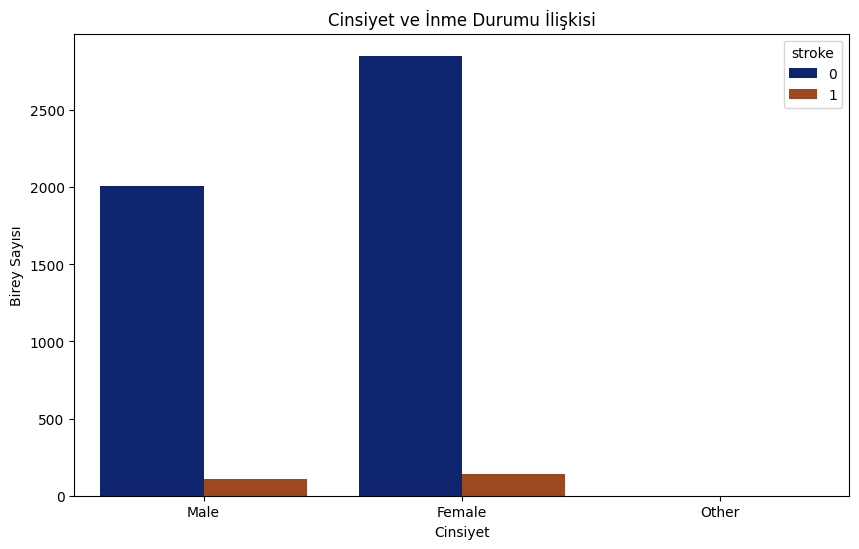

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='stroke', data=data, palette='dark')
plt.title('Cinsiyet ve İnme Durumu İlişkisi')
plt.xlabel('Cinsiyet')
plt.ylabel('Birey Sayısı')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> How does the combination of risk factors amplify stroke likelihood?
</span>

In [72]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral11
from bokeh.models import ColumnDataSource
import pandas as pd

# Veriyi işleme
data['combined_risk'] = data['hypertension'].astype(str) + "_" + data['heart_disease'].astype(str) + "_" + data['smoking_status'].astype(str)

# Veriyi sayma (toplam frekansları elde etme)
risk_counts = data['combined_risk'].value_counts().reset_index()
risk_counts.columns = ['combined_risk', 'count']

# Bokeh için etkileşimli histogram oluşturma
output_notebook()  # Çıktıyı Jupyter Notebooks'ta görselleştirmek için

# ColumnDataSource oluşturma
source = ColumnDataSource(risk_counts)

# Bokeh grafik oluşturma
p = figure(x_range=risk_counts['combined_risk'].unique(), height=400, width=800, title="Risk Faktörlerinin Kombinasyonu ve İnme Durumu İlişkisi",
           toolbar_location=None, tools="hover,pan,box_zoom,reset")

# Histogram çizimi (vbar kullanarak)
p.vbar(x='combined_risk', top='count', width=0.9, color='green', legend_field="combined_risk", source=source)

p.xaxis.axis_label = "Risk Faktörlerinin Kombinasyonu"
p.yaxis.axis_label = "Frekans"
p.xaxis.major_label_orientation = "vertical"
p.legend.title = 'Risk Kombinasyonu'

show(p)


Loading BokehJS ...

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do lifestyle and residence type influence stroke patterns?
</span>

In [73]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import RdYlGn
import pandas as pd

# Veriyi işleme
# residence_type ve stroke için renkleri belirleyelim
data['stroke_color'] = data['stroke'].map({0: 'green', 1: 'red'})

# Veriyi sayma (toplam frekansları elde etme)
residence_counts = data.groupby(['residence_type', 'stroke_color']).size().reset_index(name='count')

# Bokeh için etkileşimli histogram oluşturma
output_notebook()  # Çıktıyı Jupyter Notebooks'ta görselleştirmek için

# ColumnDataSource oluşturma
source = ColumnDataSource(residence_counts)

# Bokeh grafik oluşturma
p = figure(x_range=residence_counts['residence_type'].unique(), height=400, width=800,
           title="Yaşam Tarzı ve İkamet Türü ile İnme Durumu İlişkisi", toolbar_location=None, tools="hover,pan,box_zoom,reset")

# Histogram çizimi (vbar kullanarak)
p.vbar(x='residence_type', top='count', width=0.9, color='stroke_color', legend_field="stroke_color", source=source)

p.xaxis.axis_label = "İkamet Türü"
p.yaxis.axis_label = "Frekans"
p.xaxis.major_label_orientation = "vertical"
p.legend.title = 'İnme Durumu'

show(p)


Loading BokehJS ...

<div class="alert alert-block alert-success">

### <span style=" color:red"> What patterns emerge when analyzing age and lifestyle factors together?
</span>

How does stroke probability change as more risk factors overlap (e.g., age > 60, smoking, and heart disease)?

In [74]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd

# Veriyi işleme
# stroke için renkleri belirleyelim
data['stroke_color'] = data['stroke'].map({0: 'green', 1: 'red'})

# Bokeh için ColumnDataSource oluşturma
source = ColumnDataSource(data)

# Bokeh grafiği oluşturma
output_notebook()  # Çıktıyı Jupyter Notebooks'ta görselleştirmek için

p = figure(title="Yaş ve Yaşam Tarzı Faktörlerine Göre İnme Durumu",
           x_axis_label='Yaş', y_axis_label='Vücut Kitle İndeksi (BMI)',
           tools="pan,box_zoom,reset,hover", width=800, height=400)

# Scatter plot için circle çizme
p.circle(x='age', y='bmi', color='stroke_color', size=8, legend_field='stroke', source=source)

# HoverTool ekleme (mouse üzerine geldiğinde bilgi gösterme)
hover = HoverTool()
hover.tooltips = [("Yaş", "@age"), ("Vücut Kitle İndeksi (BMI)", "@bmi"), 
                  ("İnme Durumu", "@stroke"), ("Cinsiyet", "@gender"),
                  ("Hipertansiyon", "@hypertension"), ("Kalp Hastalığı", "@heart_disease"),
                  ("Sigara Durumu", "@smoking_status")]
p.add_tools(hover)

# Efsane başlığı ve yönlendirmeyi ayarlama
p.legend.title = "İnme Durumu"
p.legend.location = "top_left"

show(p)


Loading BokehJS ...

In [75]:
marital_vs_stroke = data.groupby('ever_married')['stroke'].mean()

print(marital_vs_stroke)


ever_married
No     0.016505
Yes    0.065613
Name: stroke, dtype: float64


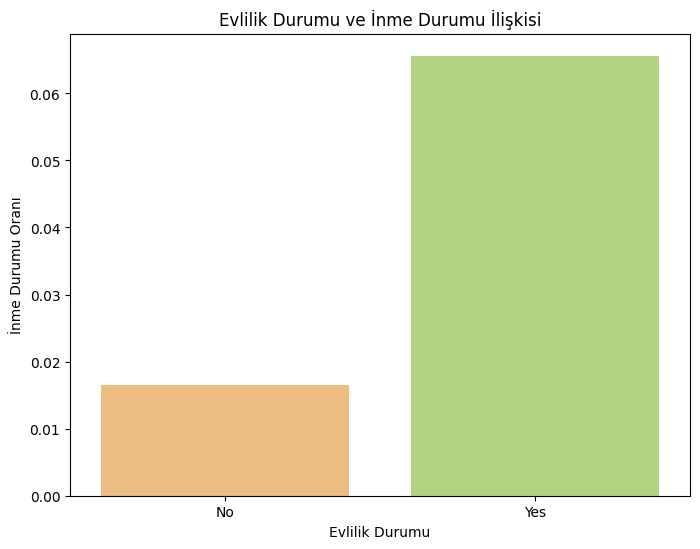

In [76]:
# Bar grafiği ile evlilik durumu ve inme durumu ilişkisinin görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.barplot(x=marital_vs_stroke.index, y=marital_vs_stroke.values, palette='RdYlGn')

# Başlık ve etiketler
plt.title("Evlilik Durumu ve İnme Durumu İlişkisi")
plt.xlabel("Evlilik Durumu")
plt.ylabel("İnme Durumu Oranı")
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Does marital status (ever_married) correlate with stroke likelihood?
</span>

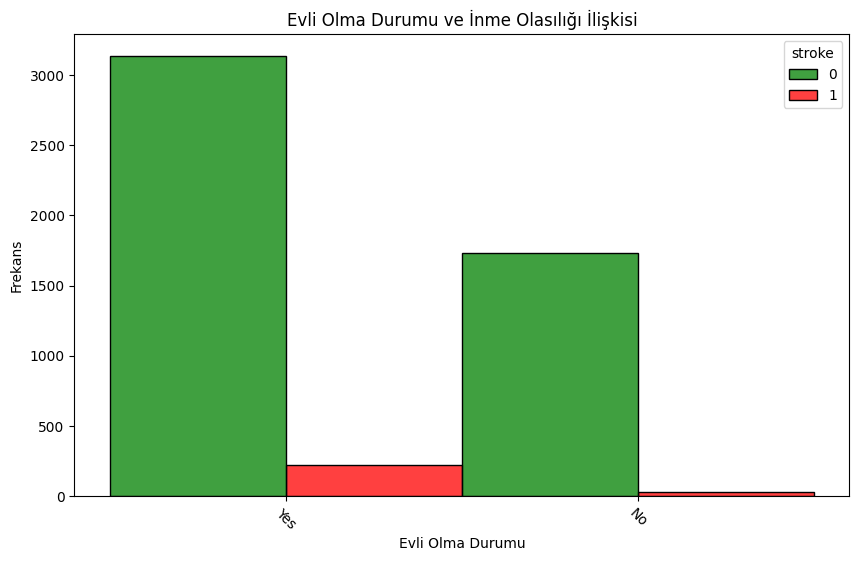

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='ever_married', hue='stroke', multiple="dodge", 
             palette={0: 'green', 1: 'red'}, 
             kde=False, bins=10)

# Grafik başlıkları ve etiketler
plt.title("Evli Olma Durumu ve İnme Olasılığı İlişkisi")
plt.xlabel('Evli Olma Durumu')
plt.ylabel('Frekans')

# Gösterme
plt.xticks(rotation=-45)
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Are there regional trends in stroke occurrence (Urban vs Rural)?
</span>

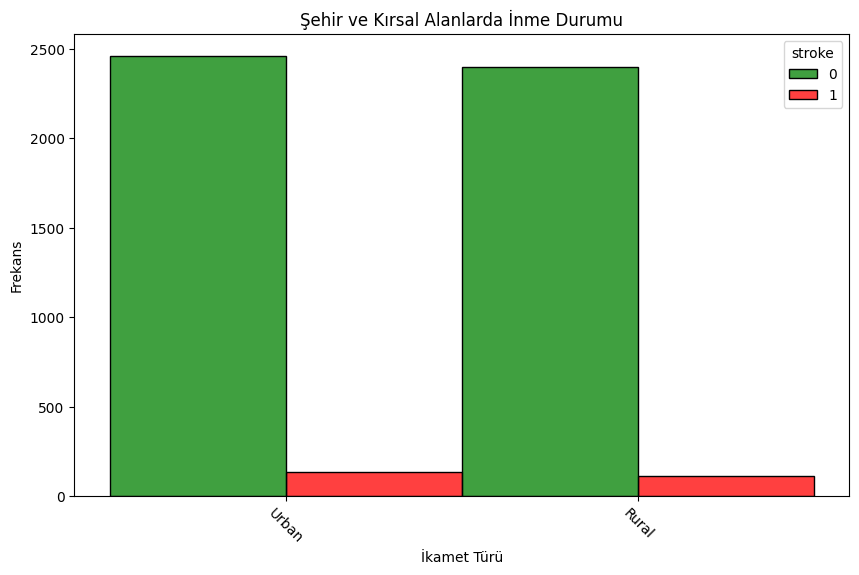

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='residence_type', hue='stroke', multiple="dodge", 
             palette={0: 'green', 1: 'red'}, kde=False, bins=10)

# Grafik başlıkları ve etiketler
plt.title("Şehir ve Kırsal Alanlarda İnme Durumu")
plt.xlabel('İkamet Türü')
plt.ylabel('Frekans')

# Gösterme
plt.xticks(rotation=-45)
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> How are continuous variables related to categorical variables?
</span>

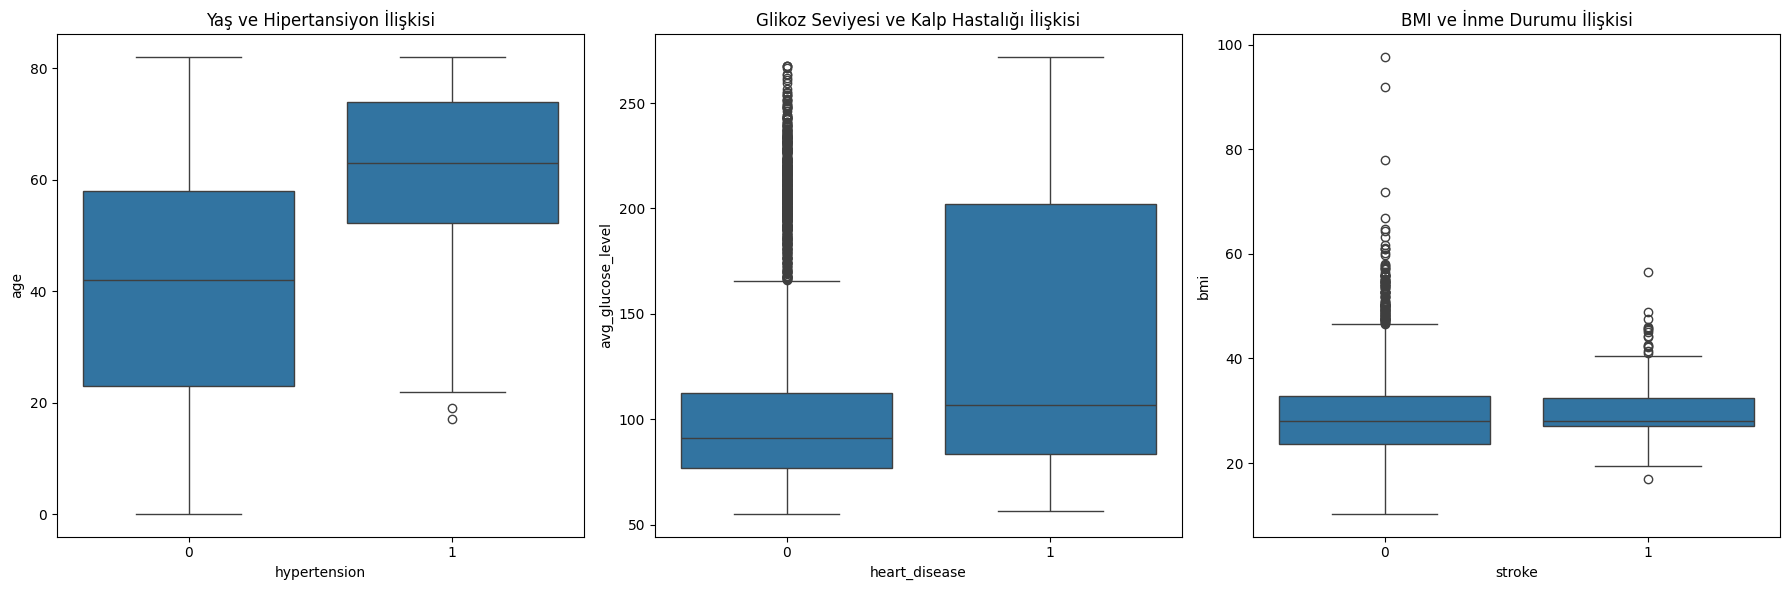

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='hypertension', y='age', data=data, ax=axes[0])
axes[0].set_title('Yaş ve Hipertansiyon İlişkisi')

sns.boxplot(x='heart_disease', y='avg_glucose_level', data=data, ax=axes[1])
axes[1].set_title('Glikoz Seviyesi ve Kalp Hastalığı İlişkisi')

sns.boxplot(x='stroke', y='bmi', data=data, ax=axes[2])
axes[2].set_title('BMI ve İnme Durumu İlişkisi')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.
</span>

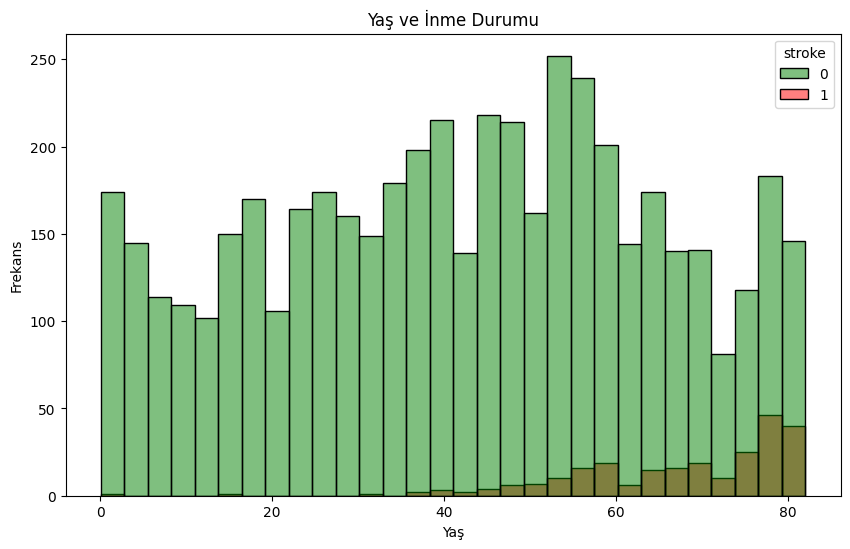

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='stroke', bins=30, palette={0: 'green', 1: 'red'}, kde=False)

# Grafik başlıkları ve etiketler
plt.title("Yaş ve İnme Durumu")
plt.xlabel('Yaş')
plt.ylabel('Frekans')

# Gösterme
plt.show()


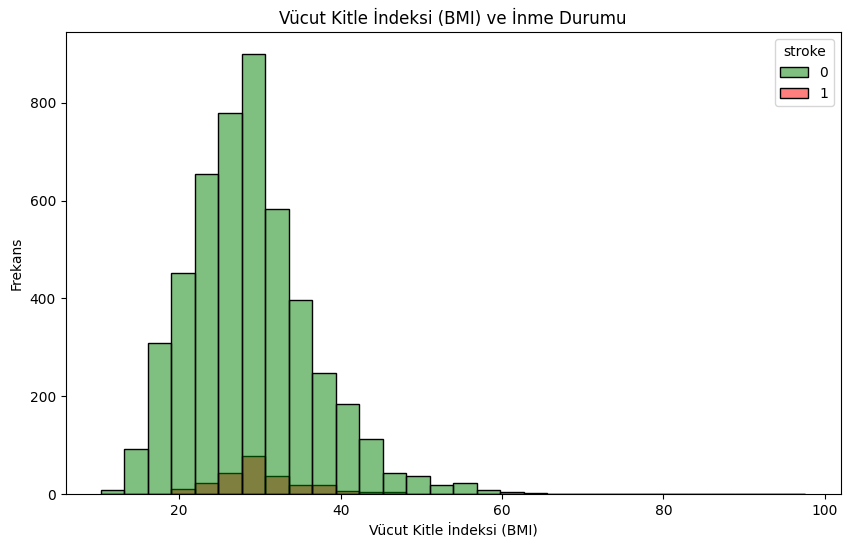

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='bmi', hue='stroke', bins=30, palette={0: 'green', 1: 'red'}, kde=False)

plt.title("Vücut Kitle İndeksi (BMI) ve İnme Durumu")
plt.xlabel('Vücut Kitle İndeksi (BMI)')
plt.ylabel('Frekans')

plt.show()


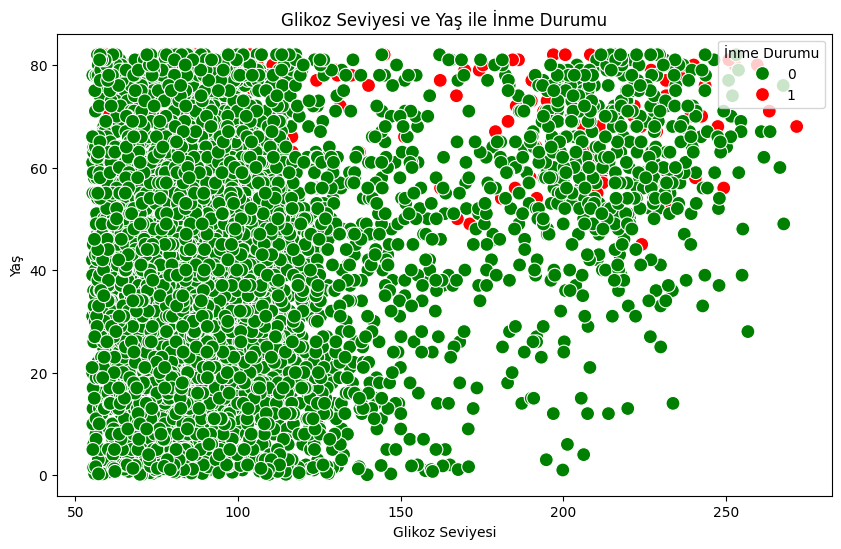

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='avg_glucose_level', y='age', hue='stroke', 
                palette={0: 'green', 1: 'red'}, s=100)

# Grafik başlıkları ve etiketler
plt.title("Glikoz Seviyesi ve Yaş ile İnme Durumu")
plt.xlabel('Glikoz Seviyesi')
plt.ylabel('Yaş')

# Gösterme
plt.legend(title='İnme Durumu', loc='upper right')
plt.show()

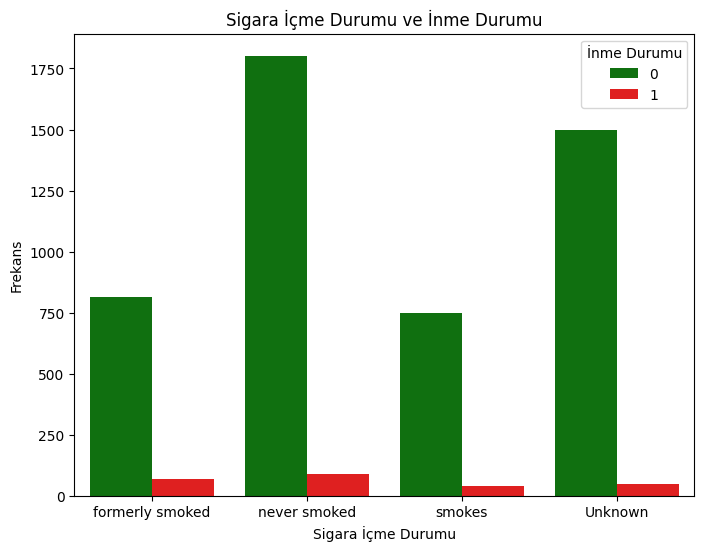

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='smoking_status', hue='stroke', 
              palette={0: 'green', 1: 'red'})

plt.title("Sigara İçme Durumu ve İnme Durumu")
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Frekans')

plt.legend(title='İnme Durumu', loc='upper right')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.
</span>

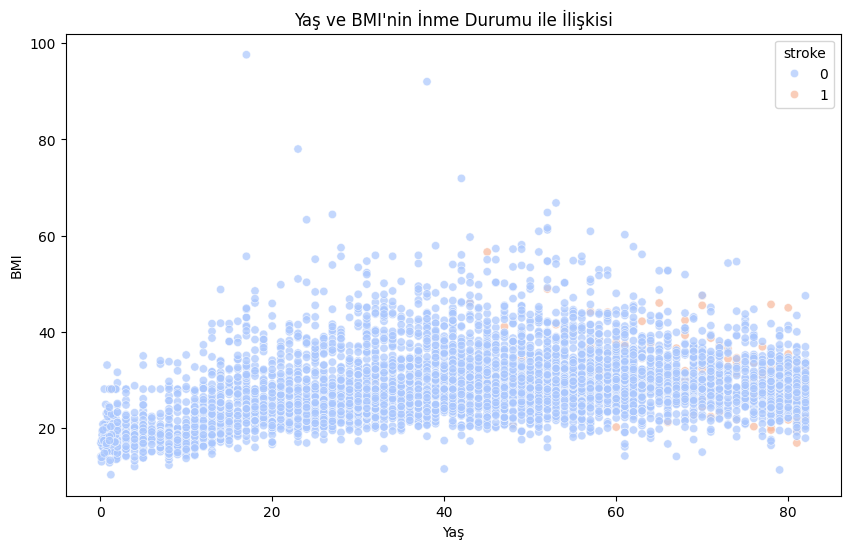

In [84]:
# Yaş ve BMI'nin İnme Durumu ile ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='bmi', hue='stroke', palette='coolwarm', alpha=0.7)
plt.title("Yaş ve BMI'nin İnme Durumu ile İlişkisi")
plt.xlabel('Yaş')
plt.ylabel('BMI')
plt.show()


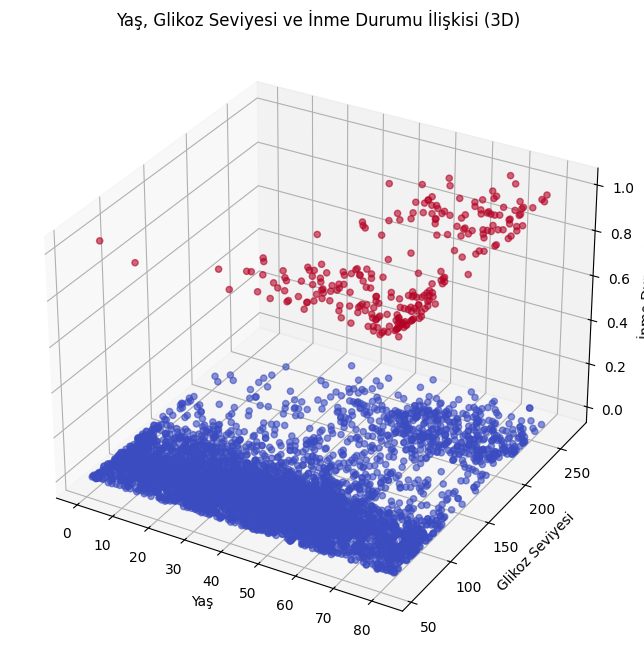

In [85]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['age'], data['avg_glucose_level'], data['stroke'], 
           c=data['stroke'], cmap='coolwarm', alpha=0.6)

ax.set_xlabel('Yaş')
ax.set_ylabel('Glikoz Seviyesi')
ax.set_zlabel('İnme Durumu')

plt.title('Yaş, Glikoz Seviyesi ve İnme Durumu İlişkisi (3D)')
plt.show()


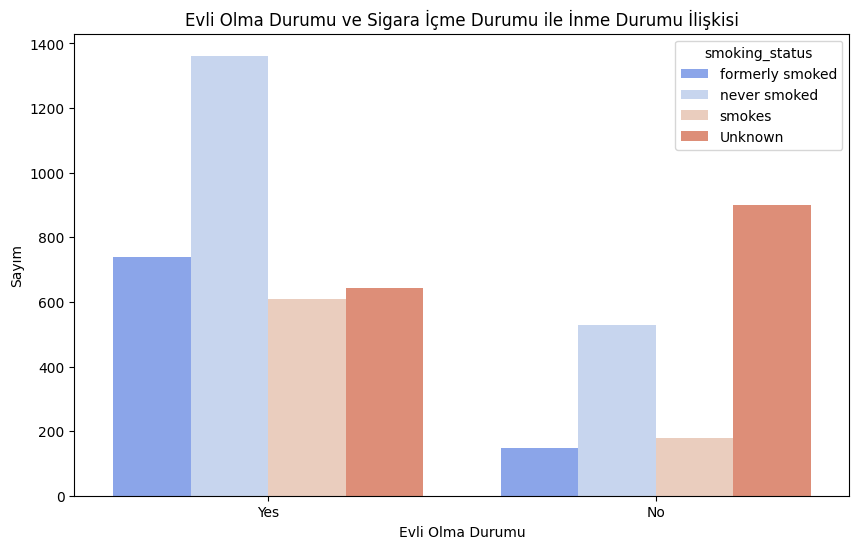

In [86]:
# Evli Olma Durumu ve Sigara İçme Durumu 
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_married', hue='smoking_status', data=data, palette='coolwarm')
plt.title("Evli Olma Durumu ve Sigara İçme Durumu ile İnme Durumu İlişkisi")
plt.xlabel('Evli Olma Durumu')
plt.ylabel('Sayım')
plt.show()


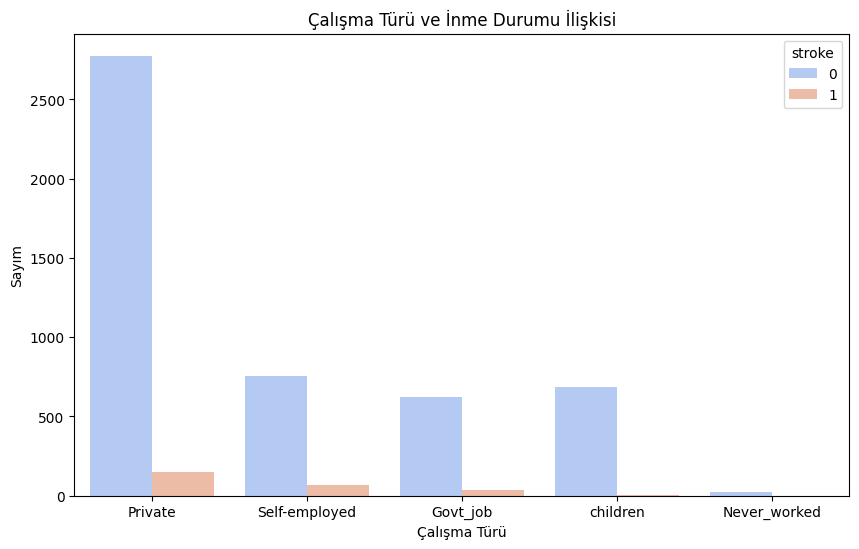

In [87]:
# Çalışma Türü ve İnme Durumu 
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', hue='stroke', data=data, palette='coolwarm')
plt.title("Çalışma Türü ve İnme Durumu İlişkisi")
plt.xlabel('Çalışma Türü')
plt.ylabel('Sayım')
plt.show()


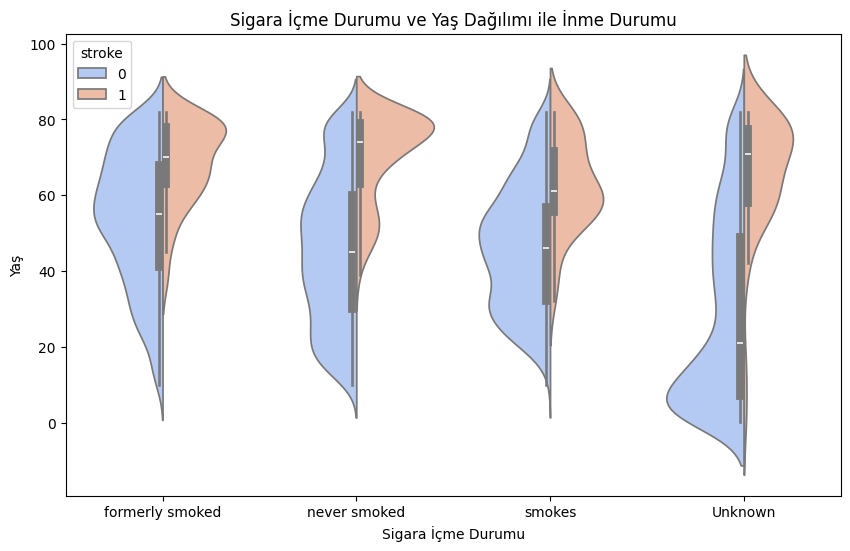

In [88]:
# Sigara İçme Durumu ve Yaş Dağılımı
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoking_status', y='age', hue='stroke', data=data, split=True, palette='coolwarm')
plt.title("Sigara İçme Durumu ve Yaş Dağılımı ile İnme Durumu")
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Yaş')
plt.show()


<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions
</span>

In [89]:
# Yaşın Anahtar Risk Faktörü Olarak Rolü
# Vücut Kitle İndeksi (BMI) ve İnme Riski
# Hipertansiyon ve Kalp Hastalığının Etkisi
# Sigara İçme Durumunun İnme Üzerindeki Etkisi
# Yaşam Tarzı ve Çalışma Durumunun Rolü
# Kentsel ve Kırsal Bölgeler Arasındaki Farklar
# Evlilik Durumunun İnme Riskiyle İlişkisi
# Risk Faktörlerinin Birleşik Etkisi







# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |